In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
image_original = cv.imread('flower.jpg')

In [16]:
for i in range (0,3):
    image_original[0][0][i]  = 0 

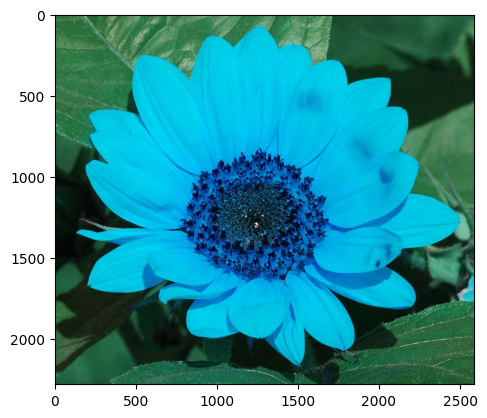

In [17]:
plt.imshow(image_original)